In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [3]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
data.shape

(8693, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data['CryoS'] = data.CryoSleep==True
data['CryoS'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9     True
Name: CryoS, dtype: bool

In [7]:
data['CryoS'] = data['CryoS'].apply(lambda x : 1 if x is True else 0)
data['CryoS'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: CryoS, dtype: int64

In [8]:
data['vip'] = data.VIP==True
data['vip'] = data['vip'].apply(lambda x : 1 if x is True else 0)

In [9]:
list = data.select_dtypes('object').columns.tolist()
list

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [10]:
data = data.dropna(subset = list)
data = data.dropna(subset = ['Transported'])

In [11]:
data.shape

(7559, 16)

In [12]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'CryoS', 'vip'],
      dtype='object')

In [13]:
data = data[['PassengerId', 'HomePlanet','Cabin', 'Destination', 'Age',
      'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'CryoS', 'vip']]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   Cabin         7559 non-null   object 
 3   Destination   7559 non-null   object 
 4   Age           7398 non-null   float64
 5   RoomService   7398 non-null   float64
 6   FoodCourt     7400 non-null   float64
 7   ShoppingMall  7378 non-null   float64
 8   Spa           7395 non-null   float64
 9   VRDeck        7389 non-null   float64
 10  Name          7559 non-null   object 
 11  Transported   7559 non-null   bool   
 12  CryoS         7559 non-null   int64  
 13  vip           7559 non-null   int64  
dtypes: bool(1), float64(6), int64(2), object(5)
memory usage: 834.1+ KB


In [15]:
numerical_cols = data.select_dtypes(include = np.number).columns.tolist()
numerical_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'CryoS',
 'vip']

In [16]:
categorical_cols = data.select_dtypes('object').columns.tolist()
categorical_cols

['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name']

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer(strategy = "mean")

In [19]:
imputer.fit(data[numerical_cols])

SimpleImputer()

In [20]:
(imputer.statistics_)

array([2.88461746e+01, 2.21319005e+02, 4.64970405e+02, 1.77069531e+02,
       3.08882623e+02, 3.05237245e+02, 3.57851568e-01, 2.38126736e-02])

In [21]:
data[numerical_cols] = imputer.transform(data[numerical_cols])

In [22]:
data[numerical_cols].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CryoS           0
vip             0
dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
categorical_cols = ['HomePlanet', 'Destination']

In [25]:
encoder = OneHotEncoder(sparse = False, handle_unknown = "ignore" )

In [26]:
encoder.fit(data[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [27]:
encoder.categories_

[array(['Earth', 'Europa', 'Mars'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object)]

In [28]:
encoder_cols = encoder.get_feature_names(categorical_cols).tolist()
encoder_cols

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e']

In [29]:
data[encoder_cols] = encoder.transform(data[categorical_cols])

In [30]:
def split1(x):
    return x.split("/")[0]
def split2(x):
    return x.split("/")[1]
def split3(x):
    return x.split("/")[2]

In [31]:
data['c1'] = data['Cabin'].apply(split1)
data['c2'] = data['Cabin'].apply(split2)
data['c3'] = data['Cabin'].apply(split3)

In [32]:
data[['c1','c2', 'c3']].head(10)

,c1,c2,c3
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
5,F,0,P
6,F,2,S
7,G,0,S
8,F,3,S
9,B,1,P


In [33]:
data[['c1','c2', 'c3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 0 to 8692
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   c1      7559 non-null   object
 1   c2      7559 non-null   object
 2   c3      7559 non-null   object
dtypes: object(3)
memory usage: 236.2+ KB


In [34]:
data.c1 = [ord(x) - 64 for x in data.c1]

In [35]:
data.c3 = [ord(x) - 64 for x in data.c3]

In [36]:
data['c2'] = data['c2'].astype(str).astype(int)

In [37]:
data.head(5)

,PassengerId,HomePlanet,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,vip,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,c1,c2,c3
0,0001_01,Europa,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,0,16
1,0002_01,Earth,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6,0,19
2,0003_01,Europa,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,19
3,0003_02,Europa,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,19
4,0004_01,Earth,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6,1,19


In [38]:
data.columns.tolist()

['PassengerId',
 'HomePlanet',
 'Cabin',
 'Destination',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported',
 'CryoS',
 'vip',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'c1',
 'c2',
 'c3']

In [39]:
numerical_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CryoS','vip','c1','c2','c3']

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(data[numerical_cols])

MinMaxScaler()

In [43]:
data[numerical_cols] = scaler.transform(data[numerical_cols])

In [44]:
y_column = ['Transported']

In [45]:
df = data[numerical_cols + encoder_cols + y_column]

In [46]:
df.head(10)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoS,vip,c1,c2,c3,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.052632,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
1,0.303797,0.010988,0.000302,0.002040,0.024500,0.002164,0.0,0.0,0.263158,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,True
2,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,0.0,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,False
3,0.417722,0.000000,0.043035,0.030278,0.148563,0.009491,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,False
4,0.202532,0.030544,0.002348,0.012324,0.025214,0.000098,0.0,0.0,0.263158,0.000528,1.0,1.0,0.0,0.0,0.0,0.0,1.0,True
5,0.556962,0.000000,0.016201,0.000000,0.012986,0.000000,0.0,0.0,0.263158,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,True
6,0.329114,0.004234,0.051622,0.000245,0.000000,0.000000,0.0,0.0,0.263158,0.001056,1.0,1.0,0.0,0.0,0.0,0.0,1.0,True
7,0.354430,0.000000,0.000000,0.000000,0.000000,0.015010,1.0,0.0,0.315789,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,True
8,0.443038,0.000000,0.026331,0.001387,0.009639,0.000000,0.0,0.0,0.263158,0.001584,1.0,1.0,0.0,0.0,0.0,0.0,1.0,True
9,0.177215,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.052632,0.000528,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_df, val_df =train_test_split(df, test_size = 0.2, random_state = 42)

In [49]:
X_train_input = train_df[numerical_cols + encoder_cols]
Y_train = train_df['Transported']

In [50]:
X_val_input = val_df[numerical_cols + encoder_cols]
Y_val = val_df['Transported']

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model1 = LogisticRegression()

In [53]:
model1.fit(X_train_input, Y_train)

LogisticRegression()

In [54]:
pred_train = model1.predict(X_train_input)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(Y_train, pred_train)

0.7727798908549695

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [58]:
confusion_matrix(Y_train, pred_train, normalize = 'true')

array([[0.82058136, 0.17941864],
       [0.2740668 , 0.7259332 ]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


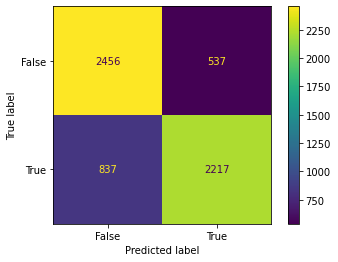

In [59]:
plot_confusion_matrix(model1, X_train_input, Y_train)

In [60]:
def predict_and_plot(inputs, targets, name=''):
    preds = model1.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 77.28%


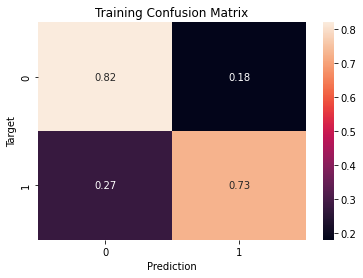

In [61]:
train_preds = predict_and_plot(X_train_input, Y_train, 'Training')